In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the left and right images
########### To use other images, alter the file paths here ########

#To use a new dataset alter the file path that is used
left_image = cv2.imread("Adirondack-perfect/im0.png")
right_image = cv2.imread('Adirondack-perfect/im1.png')

# Convert images to grayscale
left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# Initialize the stereo block matching object
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,  # Must be multiple of 16
    blockSize=5,  
    P1=8 * 5**2,  
    P2=32 * 5**2, 
    disp12MaxDiff=10,  
    uniquenessRatio=10,  
    speckleWindowSize=100,  
    speckleRange=32,  
    preFilterCap=63,
    mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
)

# Compute the disparity map
disparity_map = stereo.compute(left_gray, right_gray)




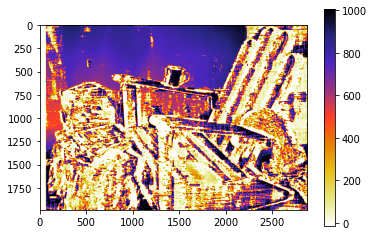

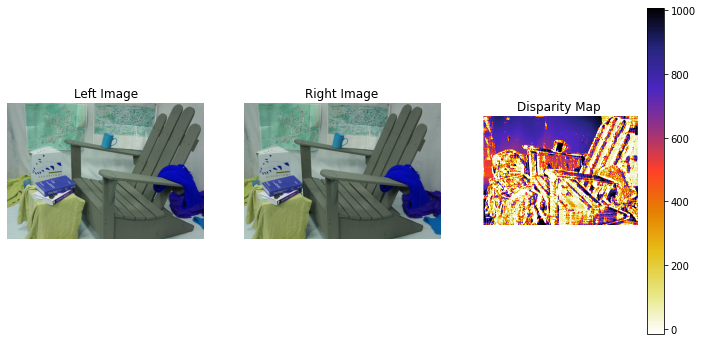

In [6]:
#Output disparity map
plt.imshow(disparity_map, cmap='CMRmap_r')
plt.colorbar()
plt.show()

# Display the original image pair
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(left_image)
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(right_image)
plt.title('Right Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(disparity_map, 'CMRmap_r')
plt.colorbar()
plt.title('Disparity Map')
plt.axis('off')

plt.show()

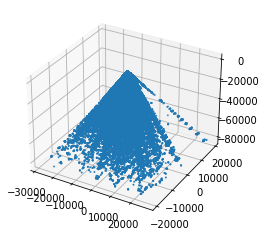

In [7]:
# Save the disparity map as numpy array
np.save('disparity_map.npy', disparity_map)

# Intrinsic parameters of the camera
focal_length = 4161.221  # Assuming the focal length is the same in x and y directions
cx = 1445.577  # The x-coordinate of the principal point
cy = 984.686  # The y-coordinate of the principal point
baseline = 176.252  # The distance between the two camera centers

# Creating the Q matrix for reprojecting
Q = np.float32([
    [1, 0, 0, -cx],
    [0, 1, 0, -cy],
    [0, 0, 0, focal_length],
    [0, 0, -1/baseline, 0]
])

# Reproject the points to 3D
points_3D = cv2.reprojectImageTo3D(disparity_map, Q)

# Reshape the points to a 2D array where each row is a point
points = points_3D.reshape(-1, 3)

# Filter out points with a disparity of 0 (indicating no measurement)
mask_map = disparity_map > disparity_map.min()
filtered_points = points[mask_map.ravel()]

#filtered_points contains the 3D coordinates of each pixel


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_points[:, 0], filtered_points[:, 1], filtered_points[:, 2], s=1)
plt.show()